# label layer metadata - probe 1

author: steeve.laquitaine@epfl.ch

In pipelines:

```bash
sbatch cluster/processing/horvath_silico/process_horvath_silico_concat_probe1.sbatch
sbatch cluster/processing/horvath_silico/process_horvath_silico_concat_probe2.sbatch
sbatch cluster/processing/horvath_silico/process_horvath_silico_concat_probe3.sbatch
````

### Setup

In [21]:
"""pipeline to add site layer metadata to vivo Marques probe-wired RecordingExtractor

author: steeve.laquitaine@epfl.ch

usage:
    
    sbatch cluster/metadata/label_vivo_marques_layers.sbatch
"""
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import spikeinterface as si
import shutil

# set project path
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.study.layer import getAtlasInfo

experiment = "silico_horvath"
run = "concatenated/probe_1"
data_conf, param_conf = get_config(experiment, run).values()
WIRED_RECORDING_PATH = data_conf["probe_wiring"]["output"]
BLUECONFIG = data_conf["dataeng"]["blueconfig"]


# HORVATH (silico)
PREP_PATH_h_silico = data_conf["preprocessing"]["output"]["trace_file_path"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-12-19 17:32:39,563 - root - utils.py - get_config - INFO - Reading experiment config.
2023-12-19 17:32:39,574 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Label site layers

In [41]:
# load probe.wired trace
Recording = si.load_extractor(WIRED_RECORDING_PATH)
probe = Recording.get_probe()

# get site layers
_, site_layers = getAtlasInfo(BLUECONFIG, probe.contact_positions)

# sanity check
assert len(site_layers) == 128, """site count does not match horvath's probe'"""

# add metadata to RecordingExtractor
Recording.set_property("layers", values=site_layers)

# rewrite
shutil.rmtree(data_conf["probe_wiring"]["output"], ignore_errors=True)
Recording.save(folder=data_conf["probe_wiring"]["output"], format="binary")

### Check site layout

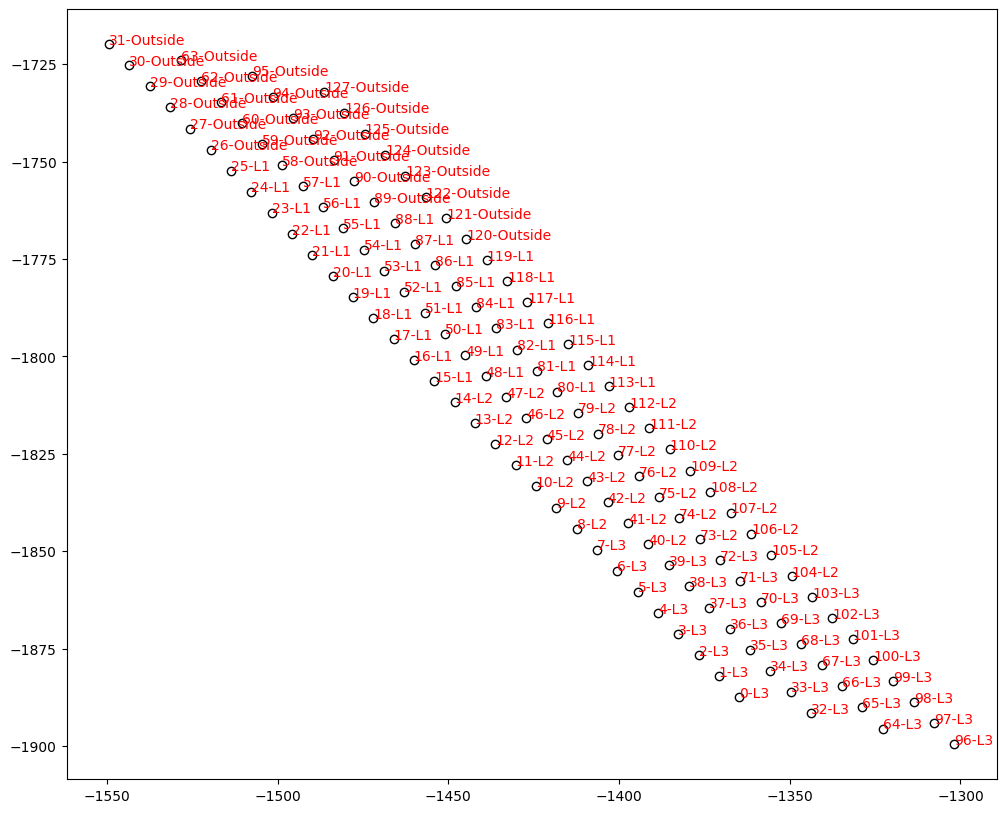

In [40]:
from matplotlib import pyplot as plt

Recording = si.load_extractor(PREP_PATH_h_silico)
Probe = Recording.get_probe()
site_layers = Recording.get_property("layers")

# plot file contact with ids
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.plot(
    Probe.contact_positions[:, 1],
    Probe.contact_positions[:, 2],
    "o",
    markerfacecolor="w",
    color="k",
)
for ix in range(len(Probe.contact_positions)):
    if ix % 1 == 0:
        ax.text(
            Probe.contact_positions[ix, 1],
            Probe.contact_positions[ix, 2],
            "%s" % (str(Probe.contact_ids[ix]) + "-" + site_layers[ix]),
            size=10,
            zorder=100,
            color="r",
        )